# Домашнее задание 1

In [280]:
! pip install gdown==4.6.3

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import gdown
import pandas as pd

## Данные

Задания 1,2 выполните для сети:

In [282]:
gdown.download(id="1OKwRSPXs212Mzttg4D0GFFkiap-GztP_", output='Wiki-Vote.txt')

Downloading...
From: https://drive.google.com/uc?id=1OKwRSPXs212Mzttg4D0GFFkiap-GztP_
To: /content/Wiki-Vote.txt
100%|██████████| 1.10M/1.10M [00:00<00:00, 111MB/s]


'Wiki-Vote.txt'

In [283]:
G = nx.read_edgelist('Wiki-Vote.txt',create_using=nx.DiGraph())
print('Nodes:',G.number_of_nodes()) # и выводим основные свойства
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))
print('Reciprocity:', nx.reciprocity(G))

Nodes: 7115
Edges: 103689
Density: 0.0020485375110809584
Reciprocity: 0.0564572905515532


## 1. Структурно-сетевые свойства направленной сети

### 1)  Распределение степеней (2 балла)
Постройте распределение степеней (in, out). Какой статистике подчиняются распределения?

### 2)  Ассортативность (1 балл)
Вычислите ассортативность, результат представьте в ввиде матрицы, всего 4 значения для разных комбинаций in/out степеней.

### 3)  Связность (1 балл)
Является ли сеть сильно/слабо связанной? Постройте распределение размеров сильно связанных компонент. Сколько вершин входит в компоненту наибольшего размера?

### 4) Кратчайшие пути (1 балл)

Определите среднюю длину кратчайшего пути в наибольшей сильно связной компоненте.

In [284]:
in_degrees = [d for n, d in G.in_degree()]
out_degrees = [d for n, d in G.out_degree()]

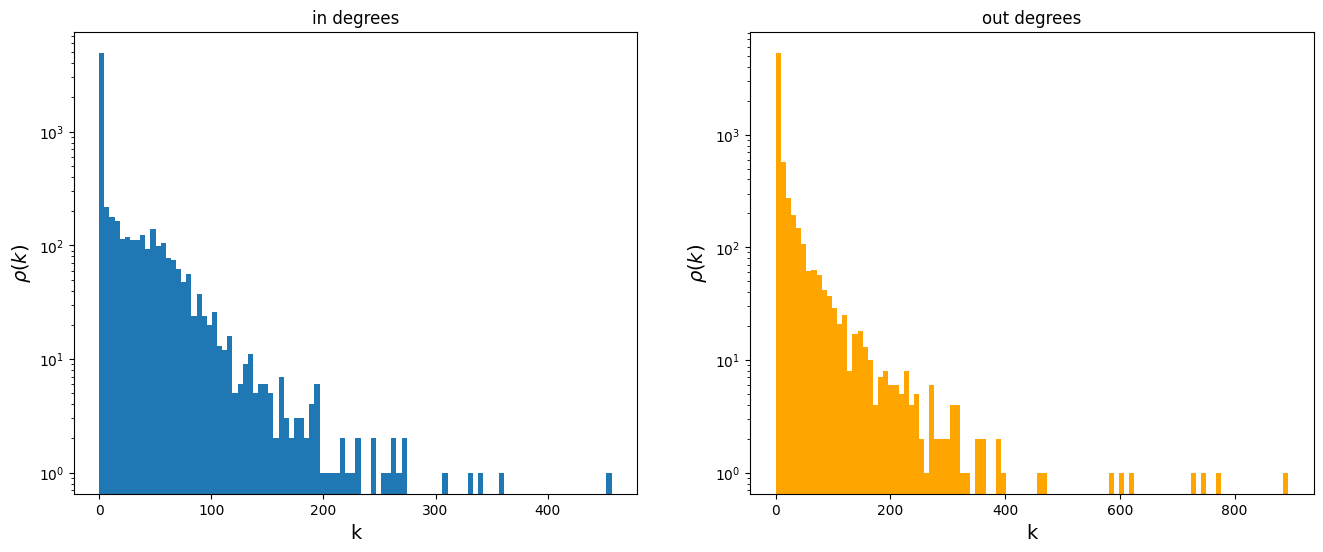

In [285]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.hist(in_degrees, bins=100, log=True)
plt.title('in degrees')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

plt.subplot(122)
plt.hist(out_degrees, bins=100, log=True, color='orange')
plt.title('out degrees')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

plt.show()

In [286]:
from scipy import stats

In [287]:
def test_visually(rvs):
    alpha, loc, scale = stats.gamma.fit(rvs)
    approach_gamma = stats.gamma.rvs(alpha, loc=loc, scale=scale, size=len(rvs))

    loc, scale = stats.expon.fit(rvs)
    approach_expon = stats.expon.rvs(loc=loc, scale=scale, size=len(rvs))

    plt.figure(figsize=(16,6))

    plt.subplot(131)
    plt.hist(out_degrees, bins=100, fc="None", ec='b', lw=2, log=True)
    plt.xlabel('k', fontsize=14)
    plt.ylabel(r'$\rho(k)$', fontsize=14)

    plt.subplot(132)
    plt.hist(approach_gamma, bins=100, fc="None", ec='r', lw=2, log=True)
    plt.xlabel('k', fontsize=14)
    plt.ylabel(r'$\rho(k)$', fontsize=14)

    plt.subplot(133)
    plt.hist(approach_expon, bins=100, fc="None", ec='g', lw=2, log=True)
    plt.xlabel('k', fontsize=14)
    plt.ylabel(r'$\rho(k)$', fontsize=14)


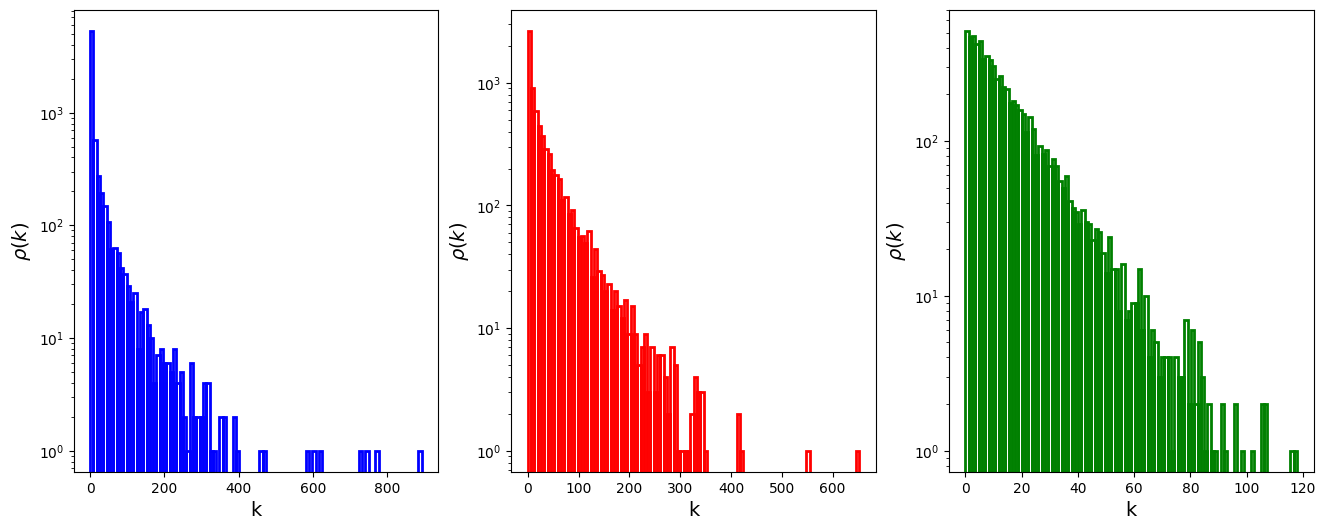

In [288]:
test_visually(in_degrees)

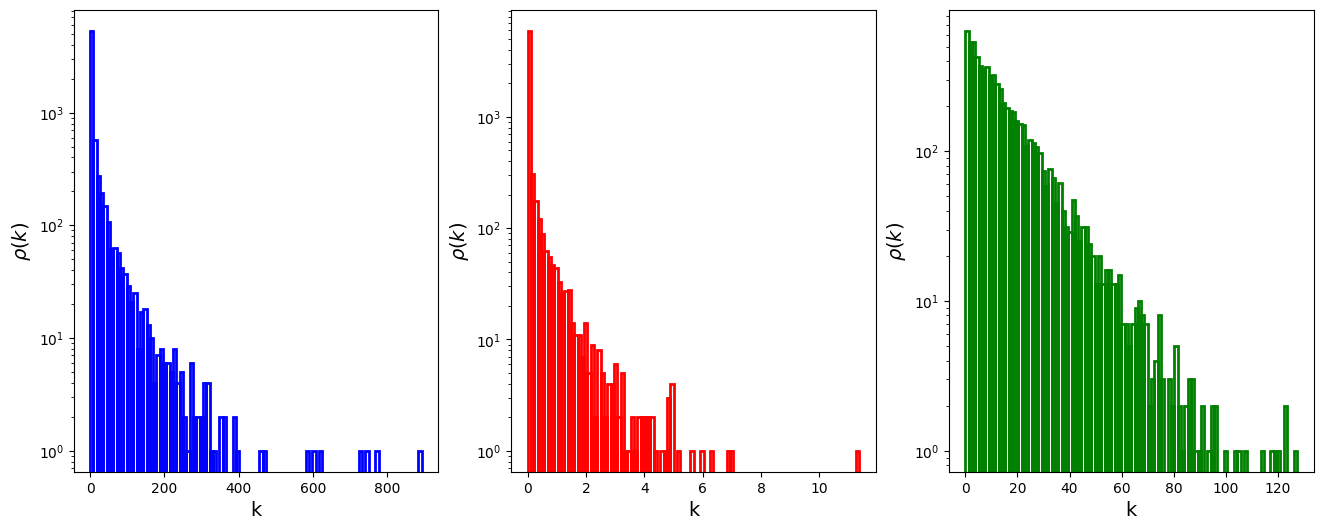

In [289]:
test_visually(out_degrees)

Удаётся только визуально проверить, используя `.fit()` из scipy. Лучше всего описывает распределение степеней вершин Гамма распределение(красный график) с параметром $\alpha <= 1 $, для in/out.

In [290]:
from itertools import product

In [291]:
assort_m = np.array(
    [nx.degree_assortativity_coefficient(G, x=p[0], y=p[1], weight=None, nodes=None)
    for p in product(['in', 'out'], repeat=2)]
).reshape((2,2))

assort_m

array([[ 0.00509101,  0.0070958 ],
       [-0.08324456, -0.01890915]])

In [292]:
nx.is_strongly_connected(G)

False

In [293]:
strong_cs = [c for c in nx.strongly_connected_components(G)]
strong_cs_lens = [len(c) for c in strong_cs]

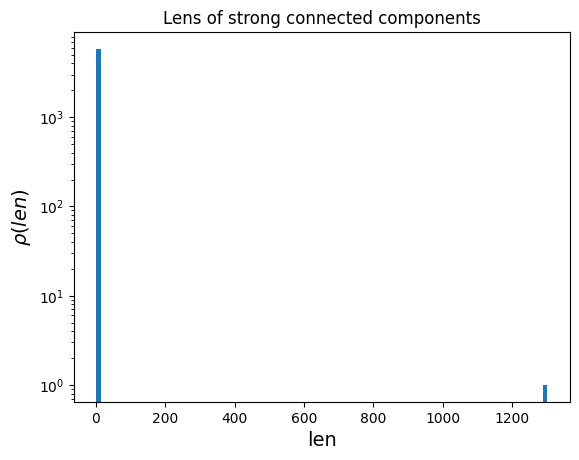

In [294]:
plt.hist(strong_cs_lens, bins=100, log=True)
plt.title('Lens of strong connected components')
plt.xlabel('len', fontsize=14)
plt.ylabel(r'$\rho(len)$', fontsize=14)

plt.show()

In [295]:
max_strong_c = G.subgraph(
    list(filter(lambda x: len(x) == max(strong_cs_lens), strong_cs))[0]
)

In [296]:
max_strong_c.number_of_nodes()

1300

In [297]:
nx.average_shortest_path_length(max_strong_c)

2.8792828803221413

## 2. Центральности и прогнозирование динамической влиятельности в направленной сети

 ### 1)  Классы (1 балл)
 Разделите вершины на два класса по значению spreading ability: "хорошо " распространяют эпидемию и "плохо".

###2)  AUC-ROC (2 балла)
Для выбранных метрик центральности (2-3 разные меры) постройте AUC-ROC кривую и вычислите соответсвующую площадь.

###3) Гибридная центральность (3 балла)
Для  гибридной центральности  постройте зависимость площади под AUC-ROC кривой от параметра  σ . Каков оптимальный параметр гибридной центральности?

In [298]:
gdown.download(id="1JziO7FuzyDWeUOGUNusHSPdppFodJ670", output='spreading_data_wiki-Vote.csv')

Downloading...
From: https://drive.google.com/uc?id=1JziO7FuzyDWeUOGUNusHSPdppFodJ670
To: /content/spreading_data_wiki-Vote.csv
100%|██████████| 187k/187k [00:00<00:00, 53.2MB/s]


'spreading_data_wiki-Vote.csv'

In [327]:
df=pd.read_csv('spreading_data_wiki-Vote.csv')
df.set_index('node')
df.head()

,node,spreading ability
0,30,0.277864
1,1412,0.000141
2,3352,0.280253
3,5254,0.278426
4,5543,0.274209


array([[<Axes: title={'center': 'spreading ability'}>]], dtype=object)

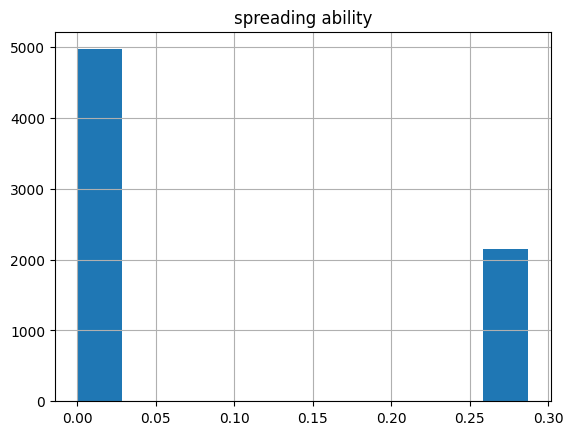

In [328]:
df.hist('spreading ability', bins=10)

In [329]:
bad_cond = np.isclose(df['spreading ability'], 0, atol=0.05)

In [336]:
(df['spreading ability'] * np.invert(bad_cond)).astype(bool)

0        True
1       False
2        True
3        True
4        True
        ...  
7110    False
7111    False
7112    False
7113    False
7114    False
Name: spreading ability, Length: 7115, dtype: bool

In [330]:
bad_spread_nodes = df[bad_cond]
good_spread_nodes = df[np.invert(bad_cond)]

In [337]:
from sklearn import metrics

In [338]:
def draw_area_roc_auc(df_target, df_pred, bad_condition, legend=None):
    y = (df_target['spreading ability'] * np.invert(bad_condition)).astype(bool)
    y_pred = df_pred['spreading ability']

    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=roc_auc,
        estimator_name=legend
    )
    display.plot()

In [310]:
from collections import defaultdict

In [323]:
degree_dict = defaultdict(list)
pagerank_dict = defaultdict(list)

for key, value in nx.degree_centrality(G).items():
    degree_dict['node'].append(int(key))
    degree_dict['spreading ability'].append(value)


for key, value in nx.pagerank(G).items():
    pagerank_dict['node'].append(int(key))
    pagerank_dict['spreading ability'].append(value)

df_degree = pd.DataFrame(degree_dict)
df_pagerank = pd.DataFrame(pagerank_dict)

In [325]:
df_degree.set_index('node')
df_degree.head()

,node,spreading ability
0,30,0.003936
1,1412,0.004076
2,3352,0.075485
3,5254,0.041889
4,5543,0.039640


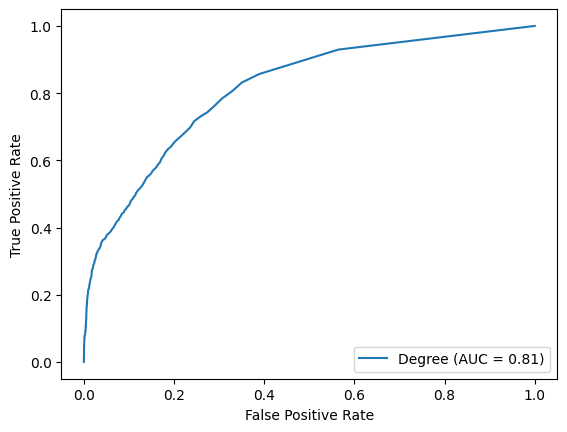

In [343]:
draw_area_roc_auc(df, df_degree, bad_cond, 'Degree')

In [326]:
df_pagerank.set_index('node')
df_pagerank.head()

,node,spreading ability
0,30,0.000173
1,1412,0.000814
2,3352,0.001785
3,5254,0.002150
4,5543,0.001051


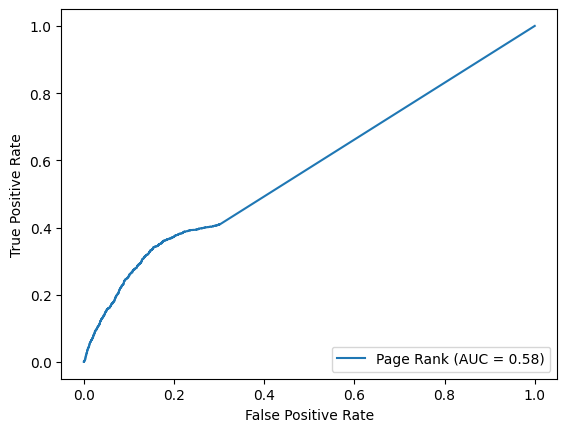

In [345]:
draw_area_roc_auc(df, df_pagerank, bad_cond, 'Page Rank')

In [350]:
def get_roc_auc_hybrid(sigma, df_target, df_in_degree, df_out_degree, bad_condition):
    y = (df_target['spreading ability'] * np.invert(bad_condition)).astype(bool)

    y_pred = (df_in_degree['spreading ability'] ** sigma) * (df_out_degree['spreading ability'] ** (1 - sigma))

    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    return metrics.auc(fpr, tpr)

In [347]:
in_degree = nx.in_degree_centrality(G)
out_degree = nx.out_degree_centrality(G)

in_degree_dict = defaultdict(list)
out_degree_dict = defaultdict(list)

for key, value in in_degree.items():
    in_degree_dict['node'].append(int(key))
    in_degree_dict['spreading ability'].append(value)
    out_degree_dict['node'].append(int(key))
    out_degree_dict['spreading ability'].append(out_degree[key])

df_in_degree = pd.DataFrame(in_degree_dict)
df_out_degree = pd.DataFrame(out_degree_dict)

df_in_degree.set_index('node')
df_out_degree.set_index('node')

None

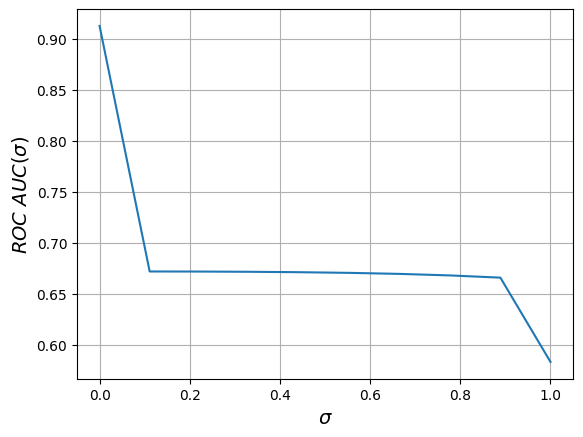

In [358]:
max_auc = 0.5
best_sigma = 0

roc_aucs = []
sigmas = np.linspace(0, 1, 10)

for sigma in sigmas:
    auc = get_roc_auc_hybrid(sigma, df, df_in_degree, df_out_degree, bad_cond)
    if auc > max_auc:
        max_auc = auc
        best_sigma = sigma
    roc_aucs.append(auc)

plt.plot(sigmas, roc_aucs)
plt.xlabel('$\sigma$', fontsize=14)
plt.ylabel(r'$ROC\ AUC(\sigma)$', fontsize=14)

plt.grid()
plt.show()

In [354]:
max_auc, best_sigma

(0.9124563230197034, 0.0)

## 3. Моделирование направленной сети с заданным значением взаимности (доли двунаправленных связей)

### 1) Генератор (3 балла)
Напишите генератор случайного направленного графа Эрдеша-Реньи с заданной вероятностью связи $p$ и долей двунаправленных связей $r$.

 ### 2) Пример сети (1 балла)
  Для нескольких выбранных пар $(p,r)$ постройте распределение степеней, вычислите транзитивность.

 ### 3) Зависимость от $r$ (3 балла)
  Пусть $p =const$, а параметр $r$ меняется в интервале $[0,1]$. Постройте зависимость транзитивности (или средний путь) сети от параметра $r$. Объясните результаты

In [479]:
from random import shuffle, choice

In [598]:
def get_connections_count(G):
    conn_from = defaultdict(set)
    for u, v in G.edges():
        if u in conn_from[v]:
            continue
        conn_from[u].add(v)
    ret = 0
    for k, s in conn_from.items():
        ret += len(s)
    return ret


def get_bidirectional_ratio(G):
    biderectional_connections_count = sum([1 if u in G[v] else 0 for u, v in G.edges() ]) // 2
    return biderectional_connections_count / get_connections_count(G)


def get_bidirected_nodes(node, G):
    return [1 if node in G[v] and v in G[node] else 0 for v in G.nodes()]


def generate_ERG_bidirection_ratio_wise(N, p, r, verbose=False):
    G = nx.erdos_renyi_graph(N, p, directed=True)
    default_number_of_edges = G.number_of_edges()

    def ret(G):
        nonlocal verbose
        nonlocal default_number_of_edges
        diff_number_edge = G.number_of_edges() - default_number_of_edges
        if verbose:
            if diff_number_edge < 0:
                print(f'-Edges removed: {-diff_number_edge}')
            elif diff_number_edge > 0:
                print(f'+Edges added: {diff_number_edge}')

            print(f'Bidirectional ratio: {get_bidirectional_ratio(G)}')
        return G

    ratio = get_bidirectional_ratio(G)
    if np.isclose(ratio, r, atol=0.05):
        return ret(G)

    diff_biderected_edges = int(G.number_of_edges() * (r - ratio))

    while abs(diff_biderected_edges) > 0:

        if diff_biderected_edges < 0:
            need_to_del = (-1) * diff_biderected_edges
            while need_to_del:
                nodes = list(G.nodes())
                shuffle(nodes)
                candidate = None
                for node in nodes:
                    candidates = get_bidirected_nodes(node, G)
                    candidates = [i for i, c in enumerate(candidates) if c == 1]
                    if len(candidates) == 0:
                        continue
                    candidate = choice(candidates)
                    if candidate is None:
                        continue
                    else:
                        candidate = (node, candidate)
                        break
                if candidate is None:
                    return ret(G)

                G.remove_edge(*candidate)
                need_to_del -= 1

        elif diff_biderected_edges > 0:
            need_to_add = diff_biderected_edges
            while need_to_add:
                nodes = list(G.nodes())
                shuffle(nodes)
                candidate = None
                for node in nodes:
                    candidates = get_bidirected_nodes(node, G)
                    candidates = [i for i, c in enumerate(candidates) if c == 0]
                    if len(candidates) == 0:
                        continue
                    candidate = choice(candidates)
                    if candidate is None:
                        continue
                    candidate = (node, candidate)
                    break
                if candidate is None:
                    return ret(G)

                G.add_edge(candidate[0], candidate[1])
                G.add_edge(candidate[1], candidate[0])
                need_to_add -= 1

        ratio = get_bidirectional_ratio(G)
        if np.isclose(ratio, r, atol=0.05):
            return ret(G)

        diff_biderected_edges = int(G.number_of_edges() * (r - ratio))

    return ret(G)

In [599]:
generated_G = generate_ERG_bidirection_ratio_wise(100, 0.5, 0.1, verbose=True)

-Edges removed: 794
Bidirectional ratio: 0.09817232375979112


In [591]:
def draw_degree_distribution(G):
    in_degrees = [d for n, d in G.in_degree()]
    out_degrees = [d for n, d in G.out_degree()]

    plt.figure(figsize=(16,6))

    plt.subplot(121)
    plt.hist(in_degrees, bins=25, log=True)
    plt.title('in degrees')
    plt.xlabel('k', fontsize=14)
    plt.ylabel(r'$\rho(k)$', fontsize=14)

    plt.subplot(122)
    plt.hist(out_degrees, bins=25, log=True, color='orange')
    plt.title('out degrees')
    plt.xlabel('k', fontsize=14)
    plt.ylabel(r'$\rho(k)$', fontsize=14)

    plt.show()

In [579]:
generated_G_51 = generate_ERG_bidirection_ratio_wise(100, 0.5, 0.1, verbose=True)

nx.transitivity(generated_G_51)

-Edges removed: 815
Bidirectional ratio: 0.09923864531373064


0.422217879599508

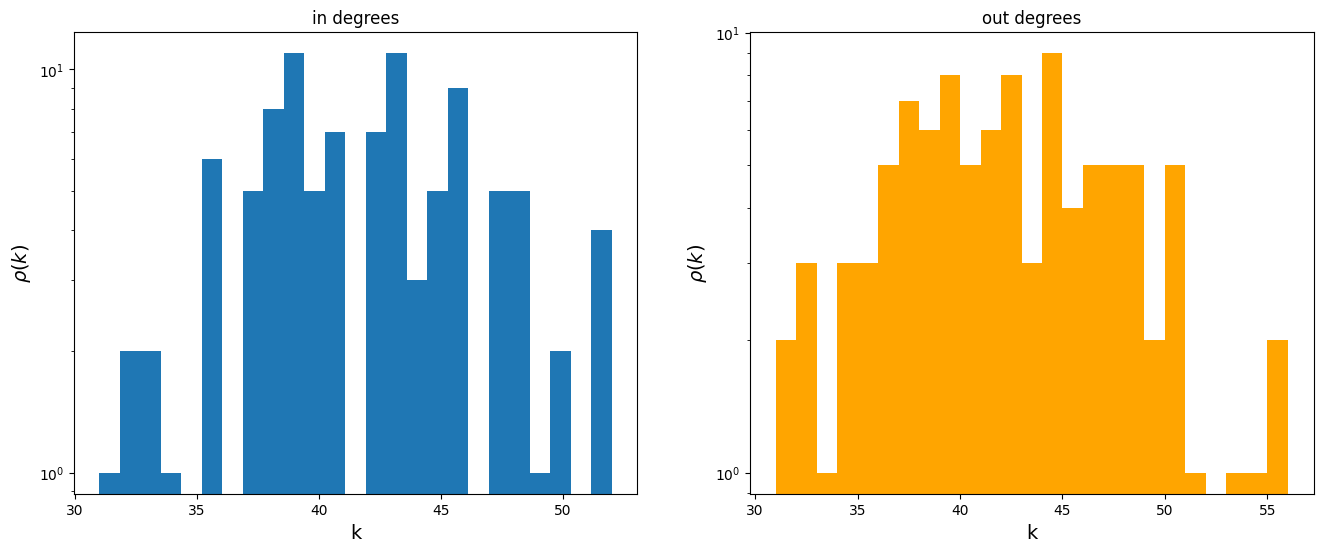

In [592]:
draw_degree_distribution(generated_G_51)

In [564]:
generated_G_55 = generate_ERG_bidirection_ratio_wise(100, 0.5, 0.5, verbose=True)

nx.transitivity(generated_G_55)

+Edges added: 1144
Bidirectional ratio: 0.5143576826196473


0.6039772886977541

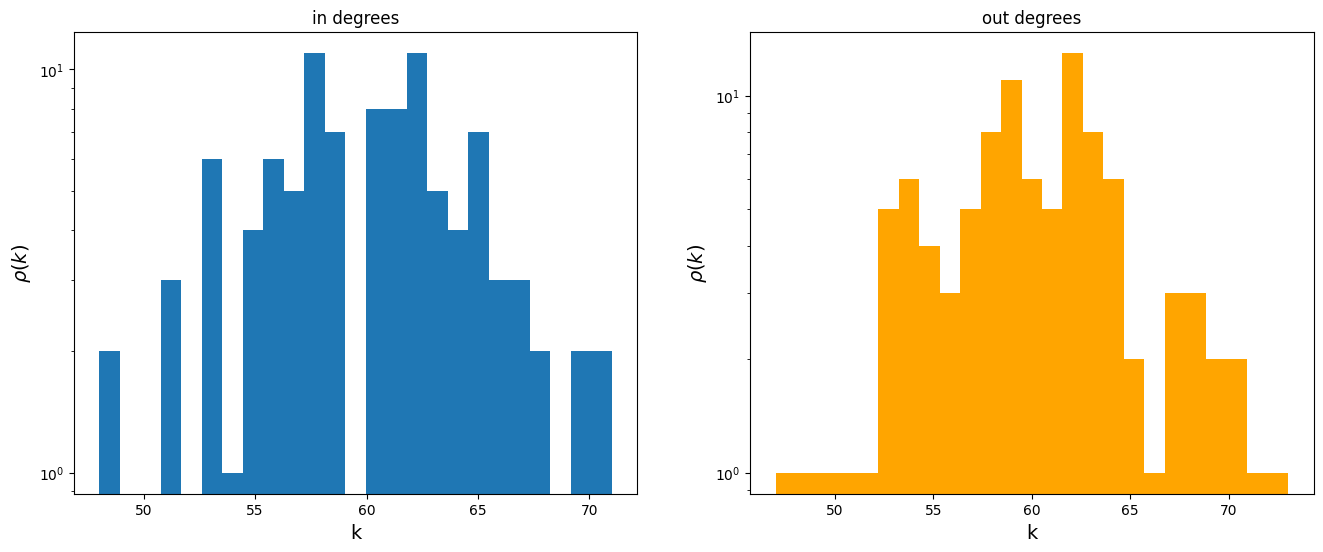

In [593]:
draw_degree_distribution(generated_G_55)

In [565]:
generated_G_59 = generate_ERG_bidirection_ratio_wise(100, 0.5, 0.9, verbose=True)

nx.transitivity(generated_G_59)

+Edges added: 3779
Bidirectional ratio: 0.8626455026455027


0.8832925848309731

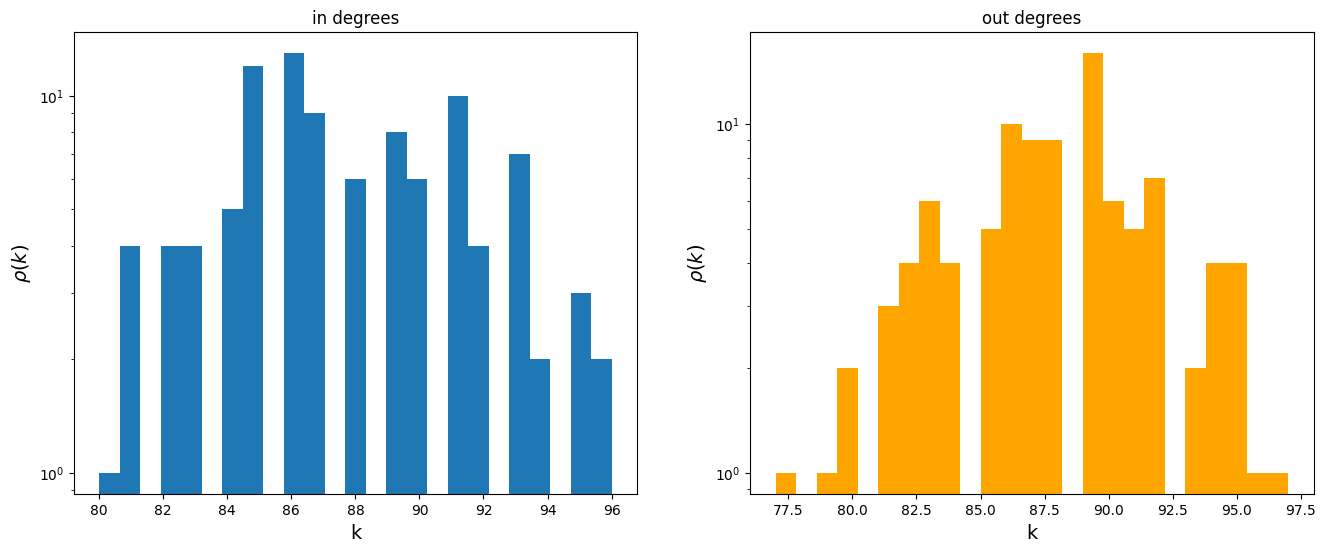

In [594]:
draw_degree_distribution(generated_G_59)

In [567]:
generated_G_95 = generate_ERG_bidirection_ratio_wise(100, 0.9, 0.5, verbose=True)

nx.transitivity(generated_G_95)

-Edges removed: 1706
Bidirectional ratio: 0.4697796644430968


0.7320886827929082

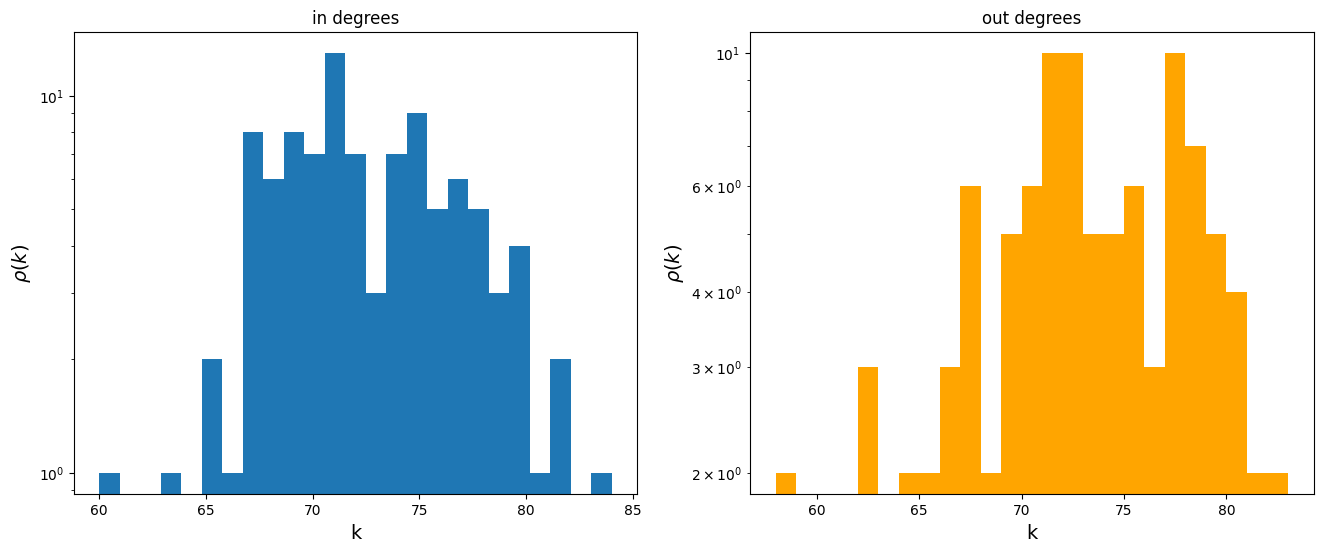

In [595]:
draw_degree_distribution(generated_G_95)

In [580]:
generated_G_99 = generate_ERG_bidirection_ratio_wise(100, 0.9, 0.9, verbose=True)

nx.transitivity(generated_G_99)

+Edges added: 754
Bidirectional ratio: 0.9469026548672567


0.9714768435698669

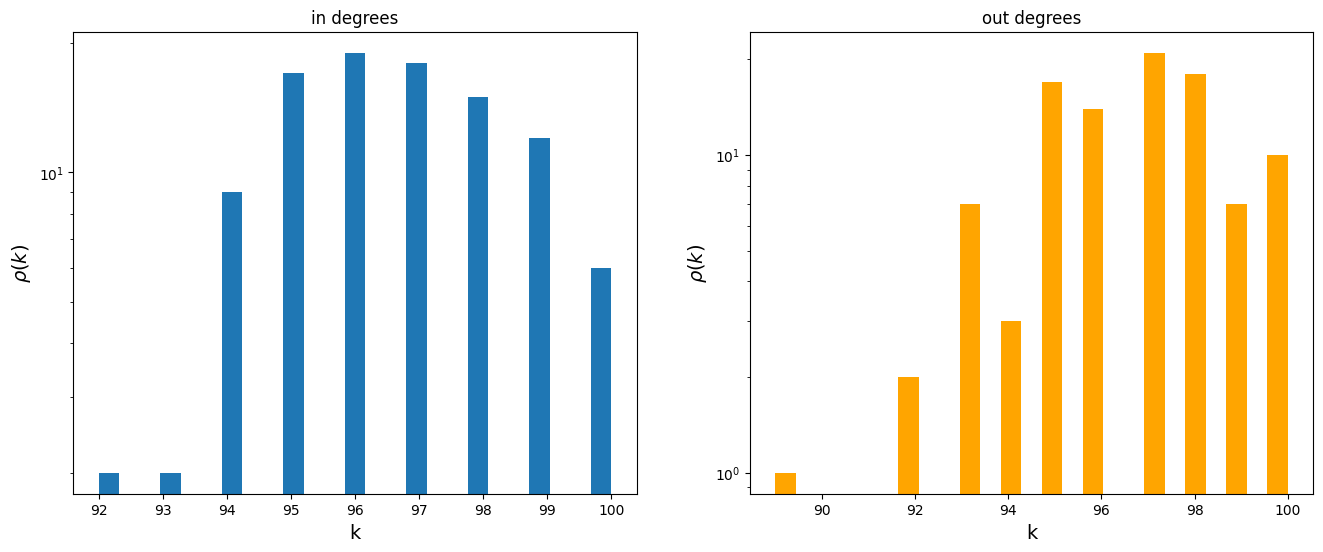

In [596]:
draw_degree_distribution(generated_G_99)

In [600]:
transitivities = []
rs = np.linspace(0, 1, 100)
for r in rs:
    transitivities.append(
        nx.transitivity(generate_ERG_bidirection_ratio_wise(100, 0.5, r))
    )

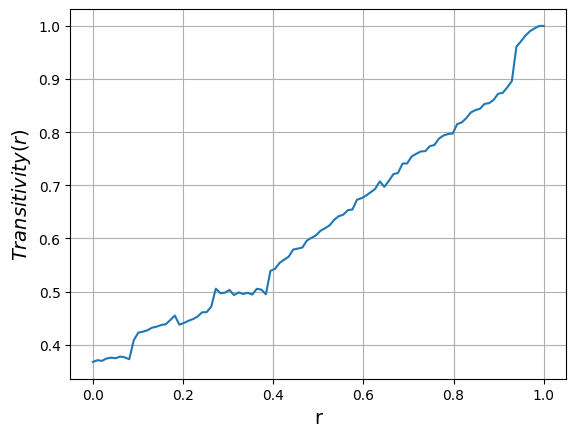

In [601]:
plt.plot(rs, transitivities)
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$Transitivity(r)$', fontsize=14)

plt.grid()
plt.show()

Увеличение доли двунаправленных связей влечет, за собой увеличение степней вершин, что влечёт за собой увеличение транзитивности.

In [602]:
avg_spl = []
rs = np.linspace(0, 1, 100)
for r in rs:
    avg_spl.append(
        nx.average_shortest_path_length(generate_ERG_bidirection_ratio_wise(100, 0.5, r))
    )

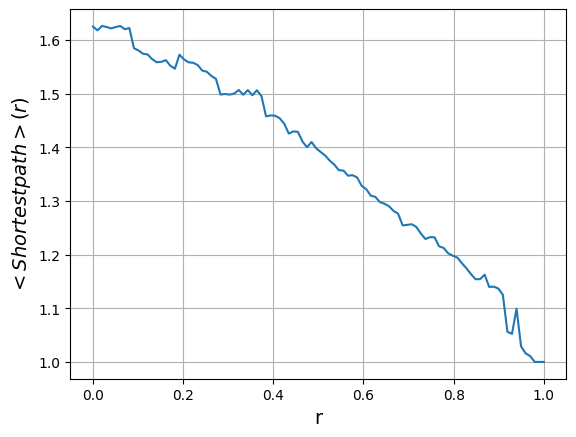

In [603]:
plt.plot(rs, avg_spl)
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$<Shortest\ path>(r)$', fontsize=14)

plt.grid()
plt.show()

Увеличение доли двунаправленных связей влечет, за собой возможность находить кратчайший путь раньше, не следуя обходному пути.